Correlación de Pearson entre Reviews y Rating: 0.03669103718154022 (p-value: 0.0007844892802524935)
Correlación de Pearson entre Followers y Rating: 0.03745630989526973 (p-value: 0.0006073698352782834)
Correlación de Spearman entre Reviews y Rating: -0.06438847266759125 (p-value: 3.6927100965293617e-09)
Correlación de Spearman entre Followers y Rating: -0.01804754754551675 (p-value: 0.09865465555596886)


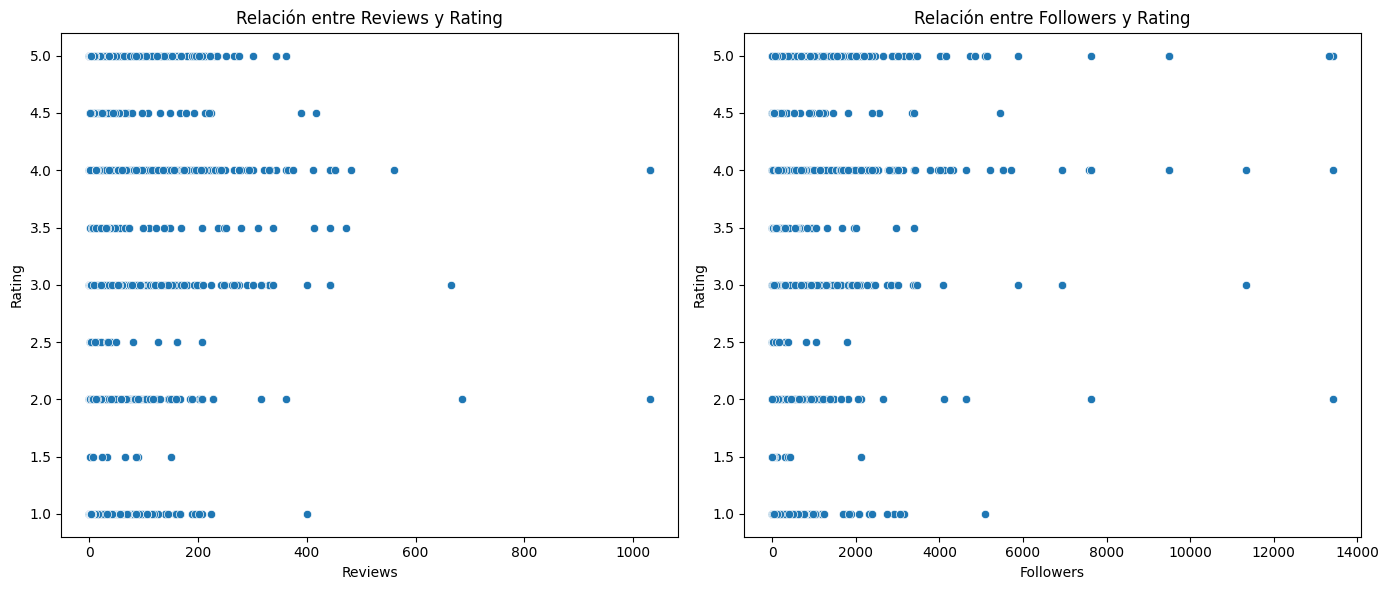

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde un archivo CSV
data = pd.read_csv('Restaurant Scrapped.csv')

# Limpiar los datos y convertir las columnas a tipo numérico
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data = data.dropna(subset=['Rating'])

# Dividir la columna 'Metadata' en dos columnas separadas para reseñas y seguidores
data[['Reviews', 'Followers']] = data['Metadata'].str.extract(r'(\d+) Reviews? , (\d+) Followers?', expand=True)

# Convertir las columnas 'Reviews' y 'Followers' a enteros
data['Reviews'] = pd.to_numeric(data['Reviews'])
data['Followers'] = pd.to_numeric(data['Followers'])

# Eliminar filas con valores nulos en 'Reviews' y 'Followers'
data = data.dropna(subset=['Reviews', 'Followers'])

# Calcular las correlaciones
pearson_corr_reviews, pearson_p_value_reviews = pearsonr(data['Reviews'], data['Rating'])
pearson_corr_followers, pearson_p_value_followers = pearsonr(data['Followers'], data['Rating'])

spearman_corr_reviews, spearman_p_value_reviews = spearmanr(data['Reviews'], data['Rating'])
spearman_corr_followers, spearman_p_value_followers = spearmanr(data['Followers'], data['Rating'])

# Mostrar los resultados
print(f'Correlación de Pearson entre Reviews y Rating: {pearson_corr_reviews} (p-value: {pearson_p_value_reviews})')
print(f'Correlación de Pearson entre Followers y Rating: {pearson_corr_followers} (p-value: {pearson_p_value_followers})')

print(f'Correlación de Spearman entre Reviews y Rating: {spearman_corr_reviews} (p-value: {spearman_p_value_reviews})')
print(f'Correlación de Spearman entre Followers y Rating: {spearman_corr_followers} (p-value: {spearman_p_value_followers})')

# Visualización de la relación entre Reviews y Rating
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Reviews', y='Rating', data=data)
plt.title('Relación entre Reviews y Rating')
plt.xlabel('Reviews')
plt.ylabel('Rating')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Followers', y='Rating', data=data)
plt.title('Relación entre Followers y Rating')
plt.xlabel('Followers')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Cargar datos desde un archivo CSV
data = pd.read_csv('Restaurant Scrapped.csv')

# Convertir la columna 'Time' a formato de fecha
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')

# Verificar si hay valores nulos después de la conversión
missing_dates = data['Time'].isnull().sum()
print(f'Número de valores faltantes en la columna Time: {missing_dates}')

# Eliminar filas con valores nulos en la columna 'Time'
data = data.dropna(subset=['Time'])

# Mostrar las primeras filas del DataFrame para verificar
print(data.head())


In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('Restaurant Scrapped.csv')

# Asegurarse de que la columna 'time' es de tipo datetime, coaccionando errores a NaT
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Eliminar filas donde 'time' es NaT (valores no válidos)
df = df.dropna(subset=['Time'])

# Extraer solo la fecha en formato corto (YYYY-MM-DD)
df['Time'] = df['Time'].dt.strftime('%Y-%m-%d')

# Guardar el dataset limpio si es necesario
df.to_csv('Restaurant Scrapped Clean.csv', index=False)

print(df.head())


Correlación entre la fecha y el rating: 0.03421081161610128


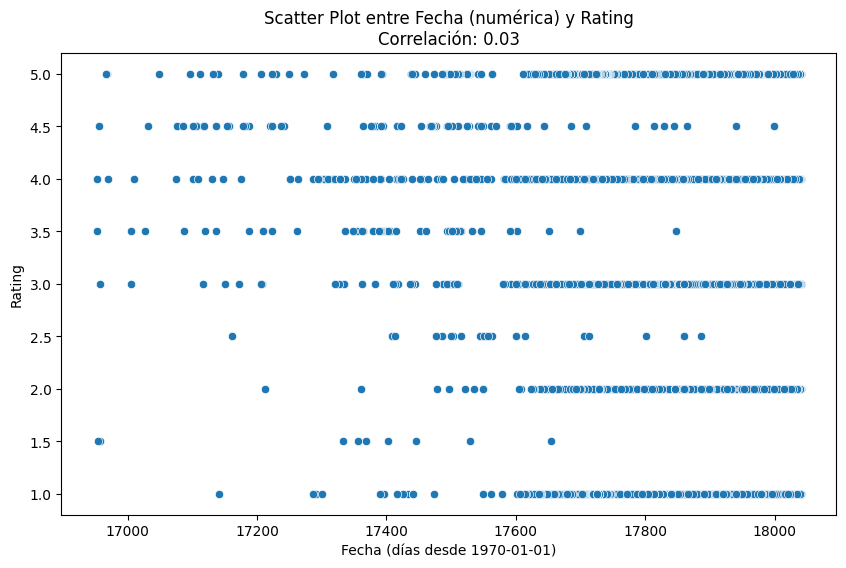

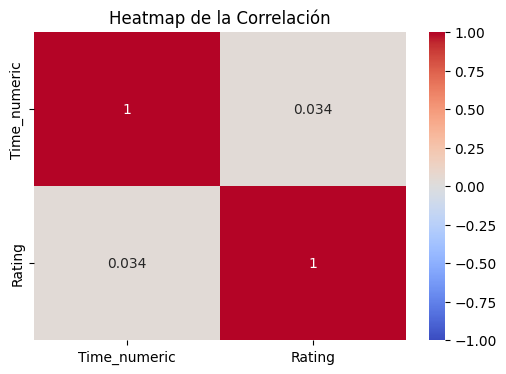

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
df = pd.read_csv('Restaurant Scrapped Clean.csv')

# Asegurarse de que la columna 'Time' es de tipo datetime
df['Time'] = pd.to_datetime(df['Time'])

# Convertir las fechas a un número de días desde una fecha de referencia
df['Time_numeric'] = (df['Time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Convertir la columna 'Rating' a tipo numérico, reemplazando los valores no numéricos con NaN
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Intentar calcular la correlación y generar las visualizaciones
try:
    # Calcular la correlación con la columna 'Rating'
    correlation = df['Time_numeric'].corr(df['Rating'])
    print(f'Correlación entre la fecha y el rating: {correlation}')
    
    # Crear un scatter plot para visualizar la relación
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Time_numeric', y='Rating', data=df)
    plt.title(f'Scatter Plot entre Fecha (numérica) y Rating\nCorrelación: {correlation:.2f}')
    plt.xlabel('Fecha (días desde 1970-01-01)')
    plt.ylabel('Rating')
    plt.show()
    
    # Crear un heatmap de la matriz de correlación
    correlation_matrix = df[['Time_numeric', 'Rating']].corr()
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Heatmap de la Correlación')
    plt.show()

except KeyError:
    print("La columna 'Rating' no existe en el dataset.")
